In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv("D:/Titanic.csv")
df = df[['Pclass', 'Sex', 'Age', 'Fare', 'Survived']].dropna()

In [7]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
X = df.drop('Survived', axis=1).values
y = df['Survived'].values.reshape(-1, 1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [9]:
input_size, hidden_size, output_size = X.shape[1], 5, 1
np.random.seed(0)
W1 = np.random.randn(input_size, hidden_size) * 0.01
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * 0.01
b2 = np.zeros((1, output_size))
lr = 0.1
losses = []

In [11]:
def relu(Z): return np.maximum(0, Z)
def relu_deriv(Z): return Z > 0
def sigmoid(Z): return 1 / (1 + np.exp(-Z))

In [15]:
for epoch in range(50):
    Z1 = X @ W1 + b1
    A1 = relu(Z1)
    Z2 = A1 @ W2 + b2
    A2 = sigmoid(Z2)
    loss = -np.mean(y * np.log(A2 + 1e-8) + (1 - y) * np.log(1 - A2 + 1e-8))
    losses.append(loss)

    dZ2 = A2 - y
    dW2 = A1.T @ dZ2 / len(X)
    db2 = np.sum(dZ2, axis=0, keepdims=True) / len(X)

    dA1 = dZ2 @ W2.T
    dZ1 = dA1 * relu_deriv(Z1)
    dW1 = X.T @ dZ1 / len(X)
    db1 = np.sum(dZ1, axis=0, keepdims=True) / len(X)

    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2

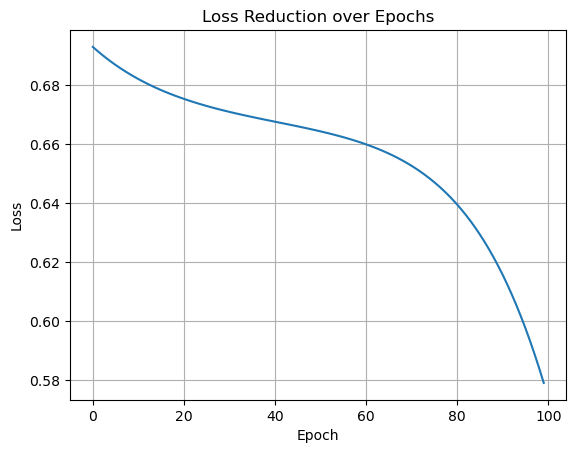

In [17]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Reduction over Epochs")
plt.grid()
plt.show()

In [19]:
print("Manual backpropagation requires careful tracking of matrix dimensions and chain rule application—debugging shape mismatches can be tricky.")

Manual backpropagation requires careful tracking of matrix dimensions and chain rule application—debugging shape mismatches can be tricky.
